In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Cite: https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem
df = pd.read_csv("../video.csv")
df = df.drop(['ID', 'DATE'], axis=1)
df = df.set_axis(['RATE', 'STATE', 'ACTIVITY', 'BMI', 'AGE', 'CAFFEINE INTAKE', 'SLEEP DURATION'], axis=1)
df.head()

,RATE,STATE,ACTIVITY,BMI,AGE,CAFFEINE INTAKE,SLEEP DURATION
0,85,0,0,24.7,21,1,6
1,81,0,0,24.7,21,1,6
2,127,1,2,24.7,21,1,6
3,91,1,3,24.7,21,1,6
4,84,1,1,24.7,21,1,6


In [5]:
# Correlation matrix
df.corr()

,RATE,STATE,ACTIVITY,BMI,AGE,CAFFEINE INTAKE,SLEEP DURATION
RATE,1.000000,-0.037951,0.721159,0.313136,-0.211020,0.028288,0.013374
STATE,-0.037951,1.000000,0.144272,-0.204233,0.211904,0.171730,-0.021847
ACTIVITY,0.721159,0.144272,1.000000,0.123866,-0.082004,0.129005,0.019727
BMI,0.313136,-0.204233,0.123866,1.000000,-0.827473,-0.427637,-0.290057
AGE,-0.211020,0.211904,-0.082004,-0.827473,1.000000,0.451373,0.361032
CAFFEINE INTAKE,0.028288,0.171730,0.129005,-0.427637,0.451373,1.000000,0.242707
SLEEP DURATION,0.013374,-0.021847,0.019727,-0.290057,0.361032,0.242707,1.000000


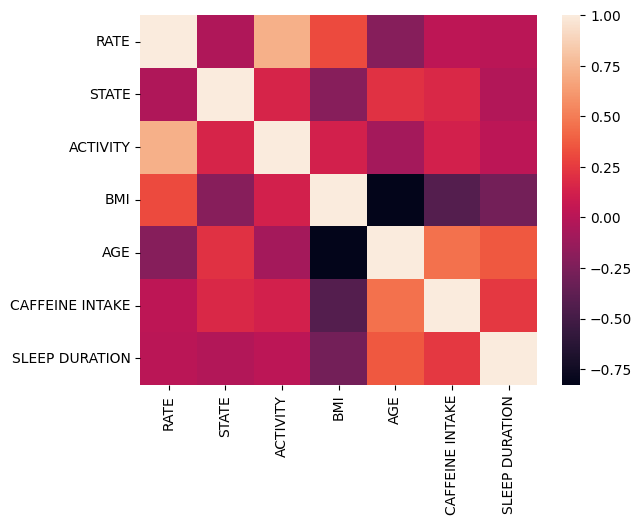

In [6]:
# Correlation matrix in Heatmap
sn.heatmap(df.corr())
plt.show()

In [55]:
# Defining ranges for classification
bins = [0, 60, 70, 80, 90, 100, 120, 140, 160]
labels = ['Very Low (0-60)', 'Low (60 - 70)', 'Medium Low (70-80)', 'Medium (80-90)', 'Medium High (90-100)', 'High (100-120)', 'Very High (120-140)', 'Extremely High (140-160)']
df['RATE CATEGORY'] = pd.cut(df['RATE'], bins=bins, labels=labels, right=False)
# df.head(100)

,RATE,STATE,ACTIVITY,BMI,AGE,CAFFEINE INTAKE,SLEEP DURATION,RATE CATEGORY
0,85,0,0,24.7,21,1,6,Medium (80-90)
1,81,0,0,24.7,21,1,6,Medium (80-90)
2,127,1,2,24.7,21,1,6,Very High (120-140)
3,91,1,3,24.7,21,1,6,Medium High (90-100)
4,84,1,1,24.7,21,1,6,Medium (80-90)
5,109,0,0,24.7,21,1,8,High (100-120)
6,147,1,1,24.7,21,1,8,Extremely High (140-160)
7,97,1,2,24.7,21,1,8,Medium High (90-100)
8,91,0,0,24.7,21,1,8,Medium High (90-100)
9,94,0,0,24.7,21,1,8,Medium High (90-100)


In [8]:
# Change categorical variables into 0/1
from sklearn.preprocessing import LabelEncoder
target="RATE CATEGORY"
df_tree = df.apply(LabelEncoder().fit_transform)
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)
feature_col_tree.remove("RATE")
# feature_col_tree.head()
categorical_columns = ['STATE', 'ACTIVITY', 'CAFFEINE INTAKE']
df_nontree=pd.get_dummies(df,columns=categorical_columns,drop_first=False)
y=df_nontree[target].values
df_nontree.drop("RATE",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

In [10]:
# Classifier method: Random forest
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=2) # test with different n_splits
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"Fold: {fold}")
    print(classification_report(y_valid,y_pred))

Xvalid is  <class 'pandas.core.frame.DataFrame'>
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.33      0.50      0.40         2
           3       0.45      0.62      0.53         8
           4       1.00      0.50      0.67         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2

    accuracy                           0.31        26
   macro avg       0.26      0.23      0.23        26
weighted avg       0.32      0.31      0.30        26

prediction:  [0 0 3 2 3 5 3 3 5 5 3 2 3 3 2 0 5 0 0 3 0 4 3 4 3 3]


c:\Users\carme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Xvalid is  <class 'pandas.core.frame.DataFrame'>
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.33      0.33         3
           2       0.00      0.00      0.00         3
           3       0.54      0.88      0.67         8
           4       0.50      1.00      0.67         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.48        25
   macro avg       0.20      0.32      0.24        25
weighted avg       0.29      0.48      0.36        25

prediction:  [1 3 2 1 3 4 4 3 3 4 3 3 3 3 3 3 4 4 4 4 4 3 3 3 1]


c:\Users\carme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

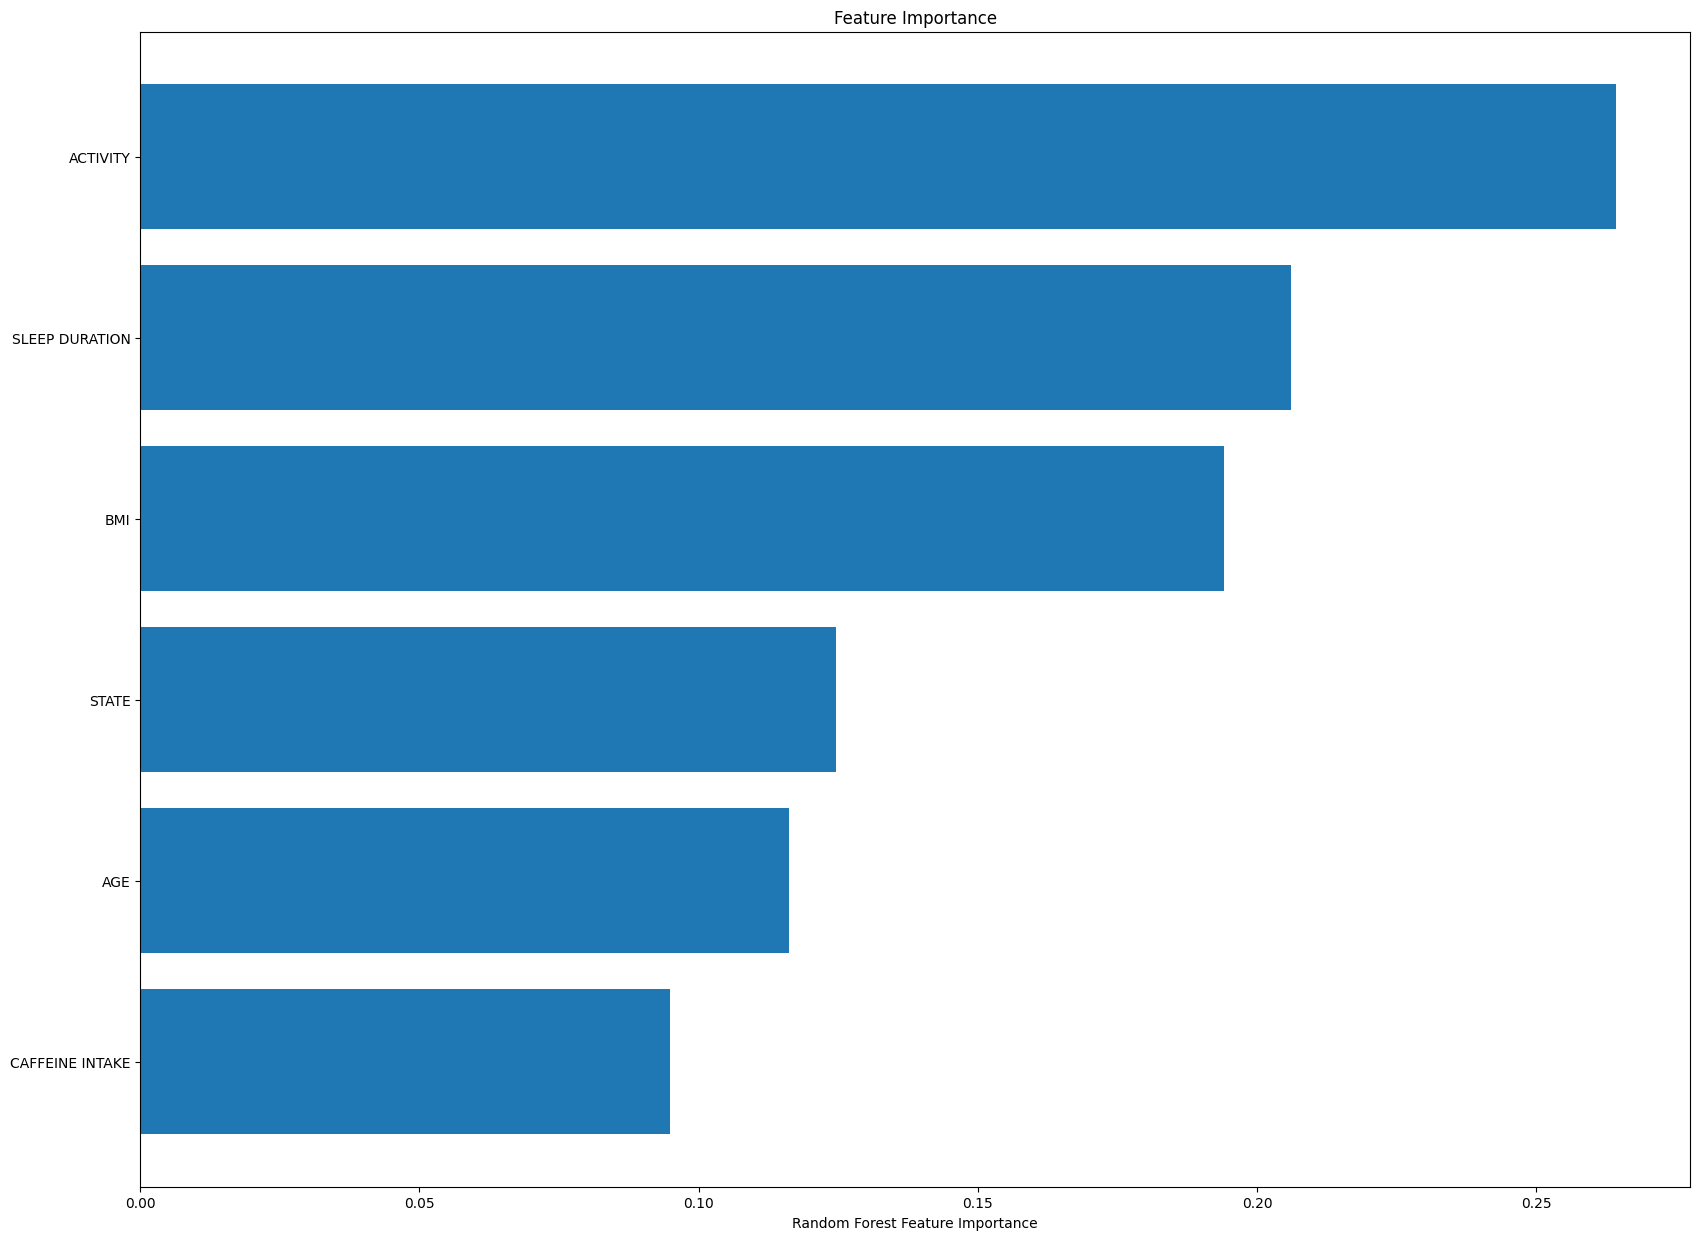

In [11]:
# Checking Feature importance 
plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [61]:
# Grab user input for prediction
y_labels = ['state', 'activity', 'bmi', 'age', 'caffeine', 'sleep']
data = []
for label in y_labels:
    print('what is your ' + label + '?: ')
    x = input()
    data.append(int(x))
    print(x)

# STATE, ACTIVITY, BMI, AGE, CAFFEINE INTAKE, SLEEP DURATION
prediction = clf.predict([data])[0]
print(labels[prediction])

what is your state?: 
0
what is your activity?: 
3
what is your bmi?: 
30
what is your age?: 
22
what is your caffeine?: 
3
what is your sleep?: 
6
Medium (80-90)


c:\Users\carme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
